In [ ]:
# I used and adapted code provided by Karan Bhanot, technical writer on Medium, in his post below 
# to extract color in this notebook
# (https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)

### Pulling Color from an Image with KMeans

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (420, 308, 3)


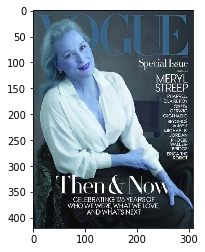

In [2]:
image = cv2.imread('../sample_images/20171201.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

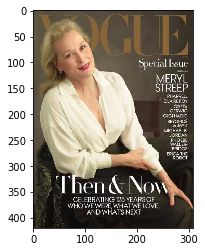

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

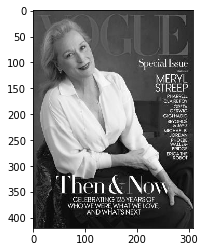

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [5]:
# this function was created by Karan Bhanot, technical writer on Medium, in his 
# blog post author "Color Identification in Images"
# (https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
# this function was created by Karan Bhanot, technical writer on Medium, in his 
# blog post author "Color Identification in Images"
# (https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)

(Color Identification in Images)

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = rgb_colors, colors = hex_colors)
    
    return rgb_colors

/Users/michaelbouzane/anaconda3/envs/dsi/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[array([158.09967119, 138.4541718 , 106.72503083]),
 array([149.50147268, 177.80940618,  24.5543943 ]),
 array([221.73383629, 212.76251318, 191.96110165]),
 array([193.98931373, 180.89153129, 151.80054358]),
 array([241.08974719, 243.33824906, 236.74110487]),
 array([186.96101424, 217.27640295,  46.5061296 ]),
 array([93.81346622, 91.95503414, 48.10052578]),
 array([38.40652771, 38.61625465, 18.36055906])]

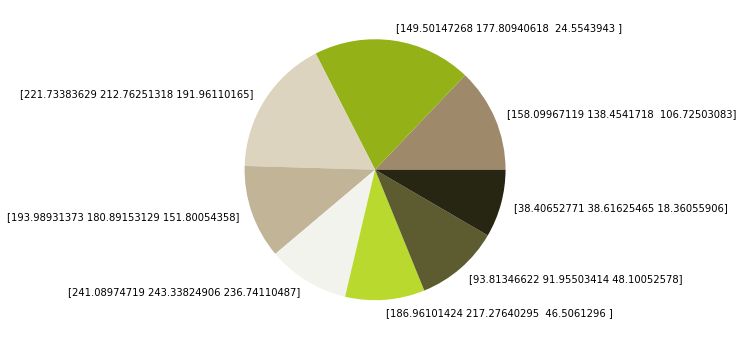

In [12]:
get_colors(get_image('../sample_images/20130501.jpg'), 8, True)

### Search Images by Color

In [21]:
IMAGE_DIRECTORY = 'sample_images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0], 
    'RED' : [128, 0, 0]
}

images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

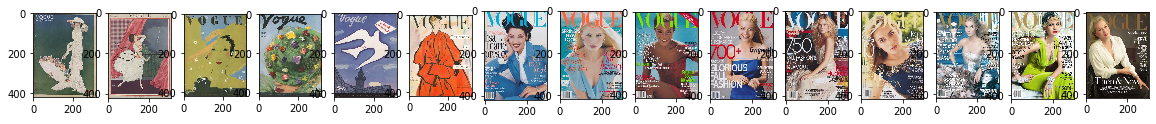

In [15]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [33]:
# this function was created by Karan Bhanot, technical writer on Medium, in his 
# blog post author "Color Identification in Images"
# (https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)

def match_image_by_color(image, color, threshold = 70, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [42]:
# this function was created by Karan Bhanot, technical writer on Medium, in his 
# blog post author "Color Identification in Images"
# (https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

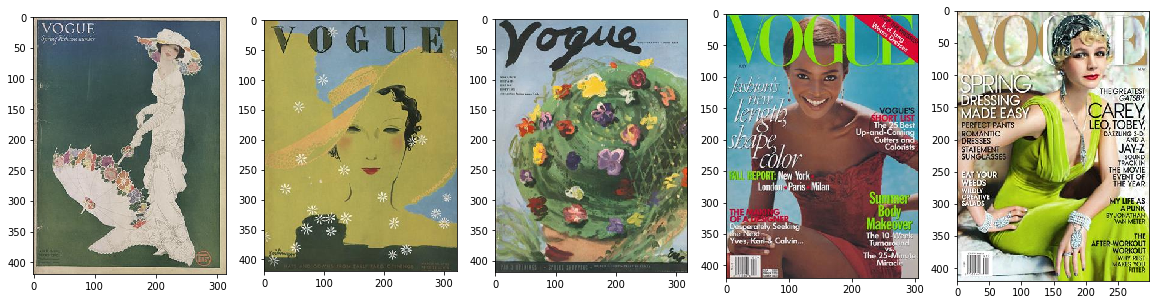

In [43]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

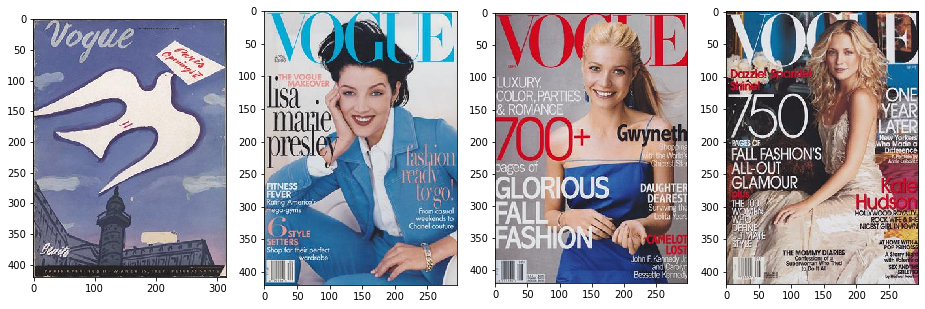

In [35]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 70, 5)  # 70 looks like the correct threshhold here!  Before, I was only 
                                                     # getting the cover for gwyneth paltrow

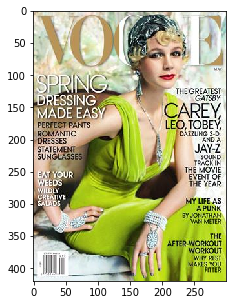

In [37]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 40, 5)  # yellow shows a lot of green at threshold 70
                                                       # returns one lime green image at threshold 40 
                                                       # not sure about showing yellow 

ValueError: num must be 1 <= num <= 5, not 6

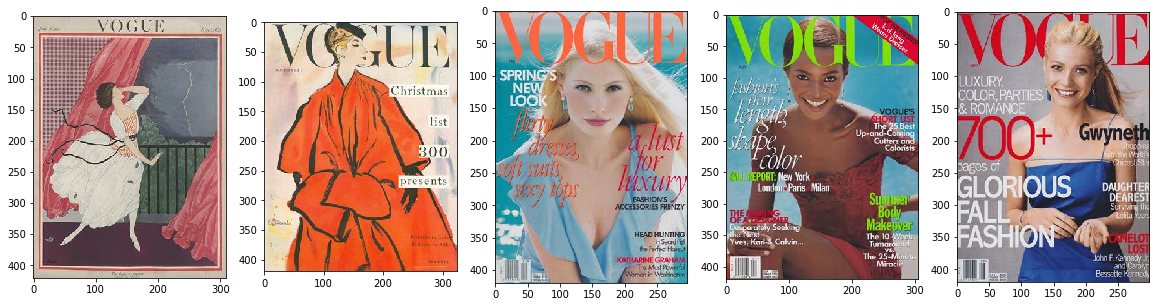

In [25]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 6)  # red is looking good - what about pink?